# Behavioural Segmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('age_income.csv')

In [3]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [4]:
df.shape

(99, 8)

In [5]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [6]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [7]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Car_Loan            0
Total Salary        0
EV_Price            0
dtype: int64

## Exploratory Data Analysis(EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Car_Loan          99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   EV_Price          99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [9]:
df.describe()

,Age,No of Dependents,Total Salary,EV_Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [10]:
df.describe(include="object")

,Profession,Marrital Status,Education,Car_Loan
count,99,99,99,99
unique,2,2,2,2
top,Salaried,Married,Post Graduate,No
freq,64,84,56,67


In [11]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Car_Loan', 'Total Salary', 'EV_Price'],
      dtype='object')

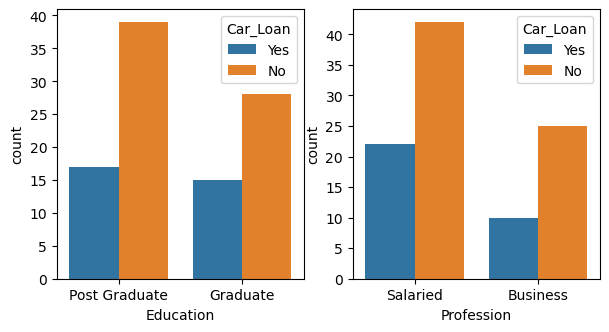

In [12]:
plt.figure(figsize=[7.00, 3.50])
plt.tight_layout()
plt.subplot(1, 2, 1)
sns.countplot(x='Education', hue='Car_Loan', data=df)
plt.subplot(1, 2, 2)
sns.countplot(x='Profession', hue='Car_Loan', data=df)

# Show the plots
plt.show()

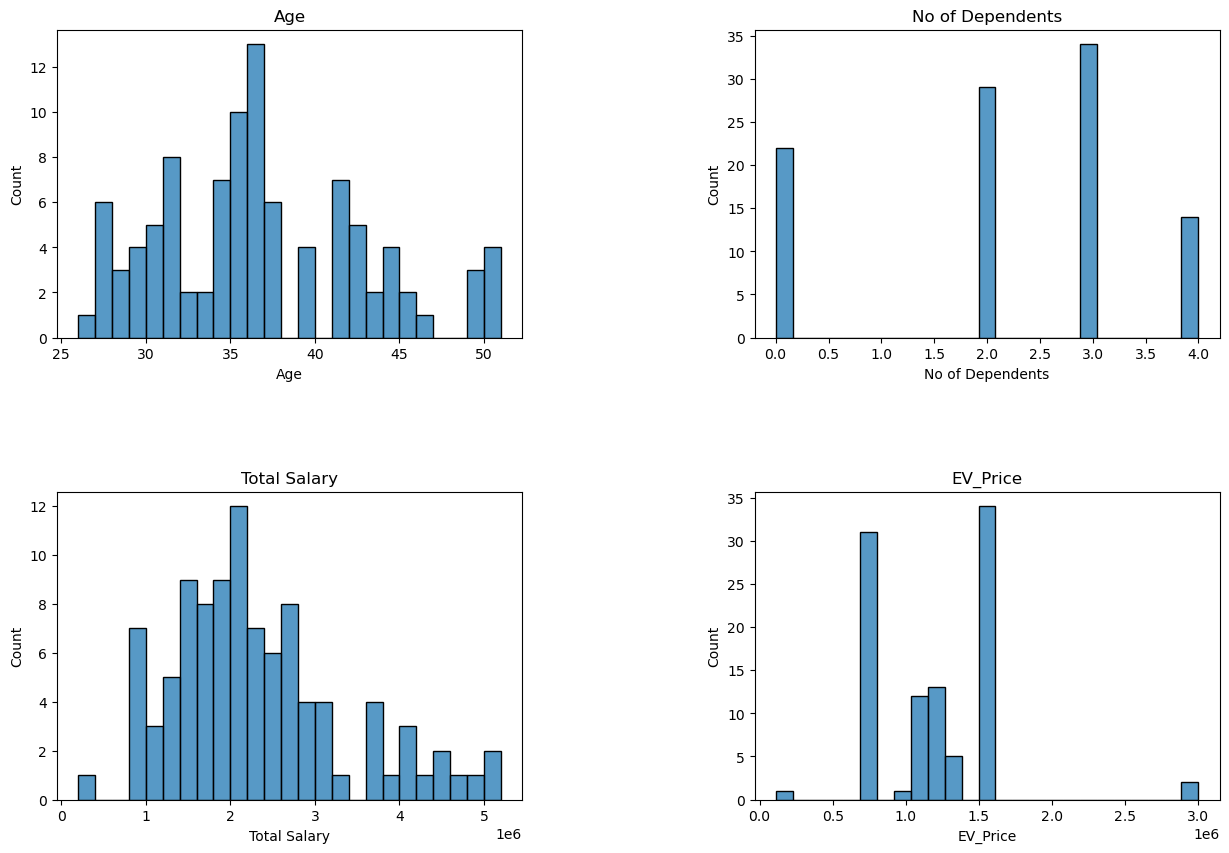

In [13]:
plt.figure(1, figsize=(15, 10))
n = 0

for x in ['Age', 'No of Dependents', 'Total Salary', 'EV_Price']:
    n += 1
    plt.subplot(2, 2, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=25)
    plt.title(f'{x}')

plt.show()

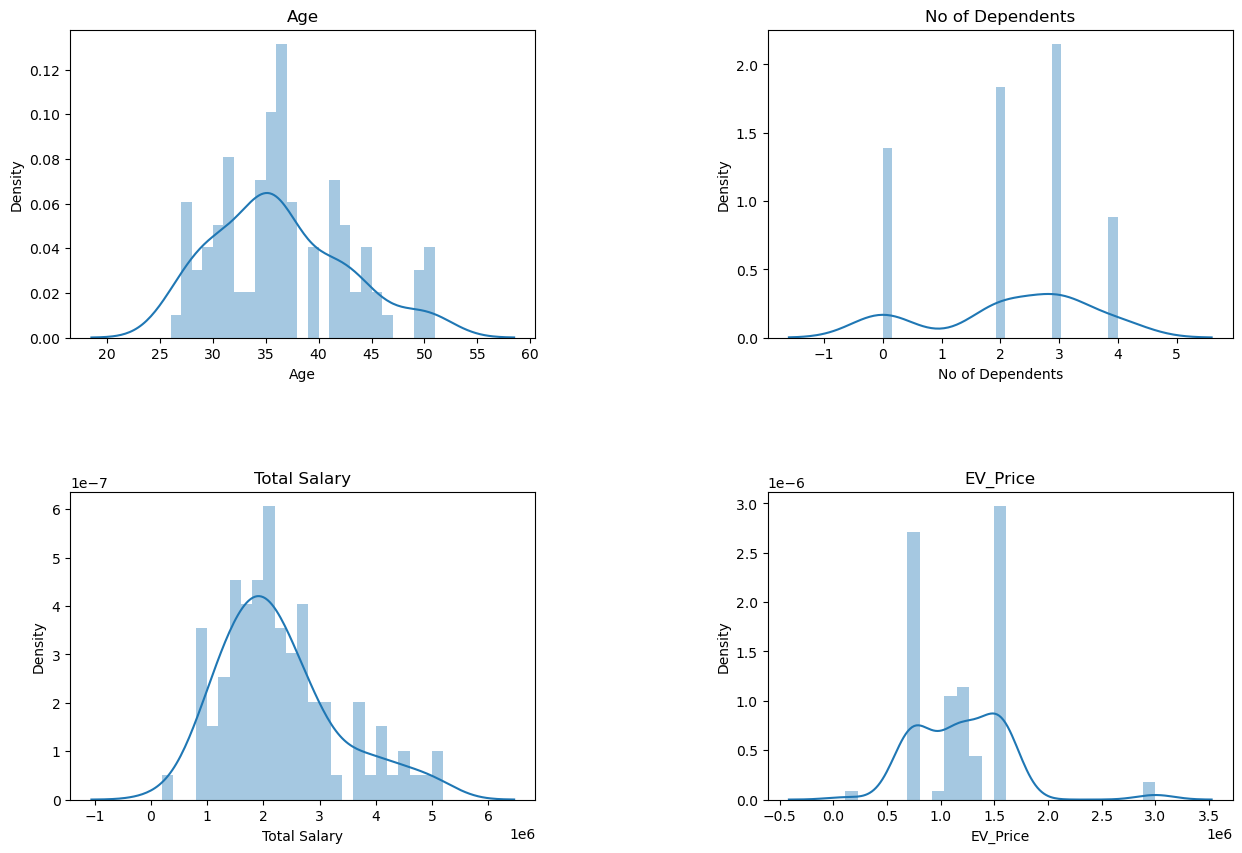

In [14]:
plt.figure(1, figsize=(15, 10))
n = 0

for x in ['Age', 'No of Dependents', 'Total Salary', 'EV_Price']:
    n += 1
    plt.subplot(2, 2, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=25)
    plt.title(f'{x}')

plt.show()

<Axes: ylabel='count'>

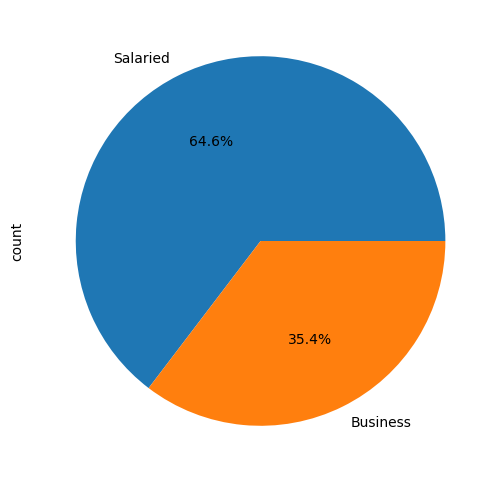

In [15]:
plt.figure(figsize=(6,6))
df["Profession"].value_counts().plot(kind="pie",autopct="%0.1f%%")

<Axes: ylabel='count'>

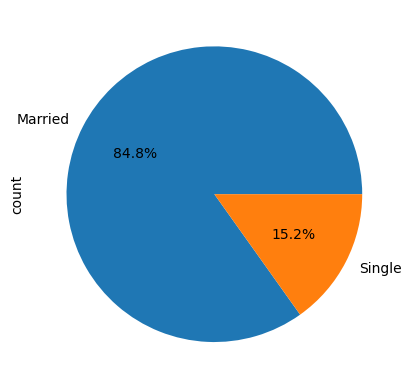

In [16]:
df["Marrital Status"].value_counts().plot(kind="pie",autopct="%0.1f%%")

<Axes: ylabel='count'>

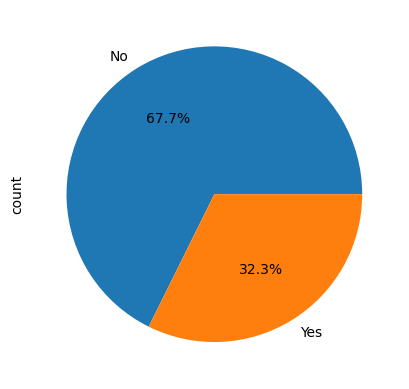

In [17]:
df["Car_Loan"].value_counts().plot(kind="pie",autopct="%0.1f%%")

<Axes: xlabel='Age', ylabel='count'>

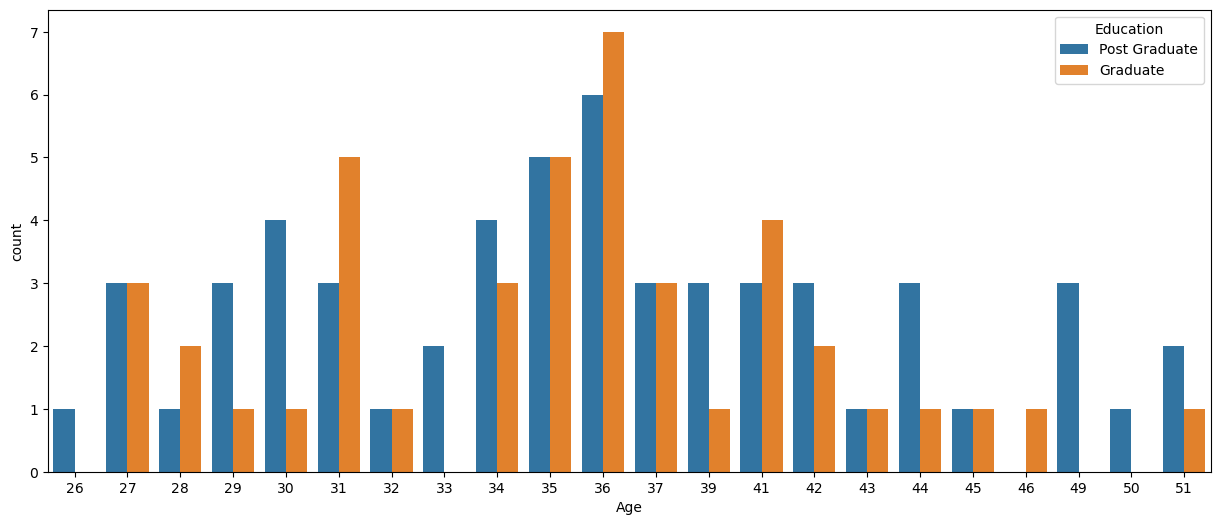

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x="Age",data=df,hue="Education")

<Axes: xlabel='Education', ylabel='count'>

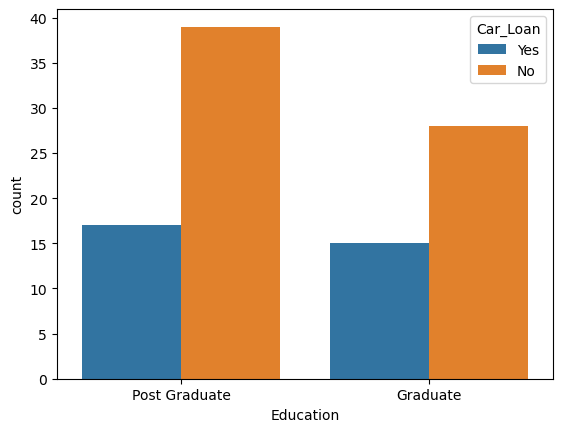

In [19]:
sns.countplot(x="Education",data=df,hue="Car_Loan")

<Axes: xlabel='Marrital Status', ylabel='count'>

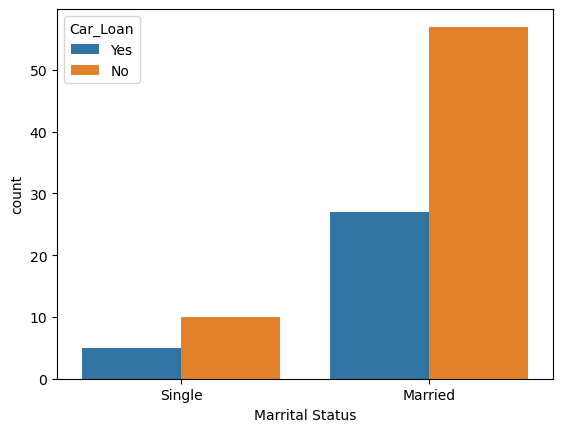

In [20]:
sns.countplot(x="Marrital Status",data=df,hue="Car_Loan")

<Axes: xlabel='Profession', ylabel='count'>

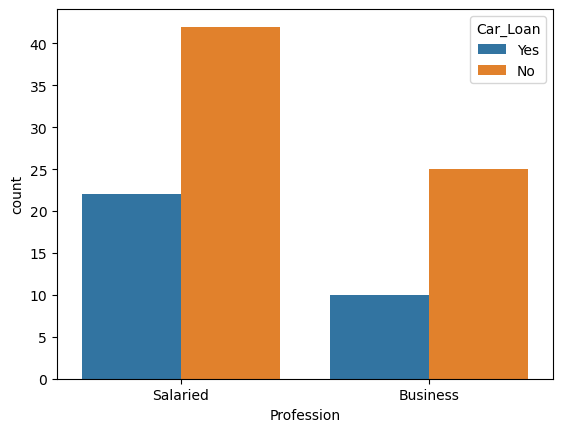

In [21]:
sns.countplot(x="Profession",data=df,hue="Car_Loan")

In [22]:
df['Marrital Status'].replace({'Single':0,'Married':1},inplace=True)
df['Car_Loan'].replace({'No':0,'Yes':1},inplace=True)
df['Education'].replace({'Graduate':0,'Post Graduate':1},inplace=True)
df['Profession'].replace({'Salaried':0, 'Business':1},inplace=True)

<Axes: xlabel='No of Dependents', ylabel='count'>

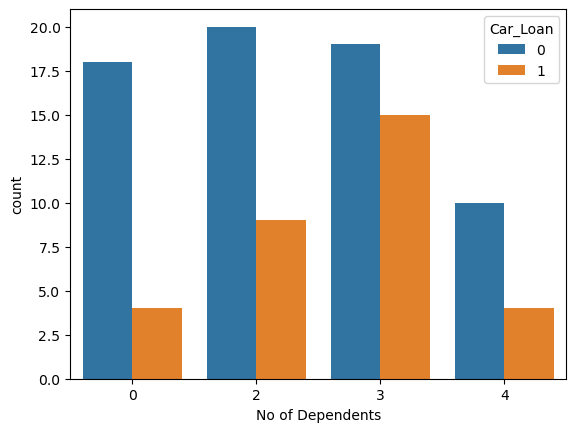

In [23]:
sns.countplot(x="No of Dependents",data=df,hue="Car_Loan")

In [24]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,0,0,1,0,1,800000,800000
1,35,0,1,1,2,1,2000000,1000000
2,45,1,1,0,4,1,1800000,1200000
3,41,1,1,1,3,0,2200000,1200000
4,31,0,1,1,2,1,2600000,1600000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               99 non-null     int64
 1   Profession        99 non-null     int64
 2   Marrital Status   99 non-null     int64
 3   Education         99 non-null     int64
 4   No of Dependents  99 non-null     int64
 5   Car_Loan          99 non-null     int64
 6   Total Salary      99 non-null     int64
 7   EV_Price          99 non-null     int64
dtypes: int64(8)
memory usage: 6.3 KB


In [26]:
df.describe()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,0.353535,0.848485,0.565657,2.181818,0.323232,2.270707e+06,1.194040e+06
std,6.246054,0.480500,0.360375,0.498193,1.335265,0.470091,1.050777e+06,4.376955e+05
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.550000e+06,8.000000e+05
50%,36.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.100000e+06,1.200000e+06
75%,41.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.700000e+06,1.500000e+06
max,51.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.200000e+06,3.000000e+06


<Axes: >

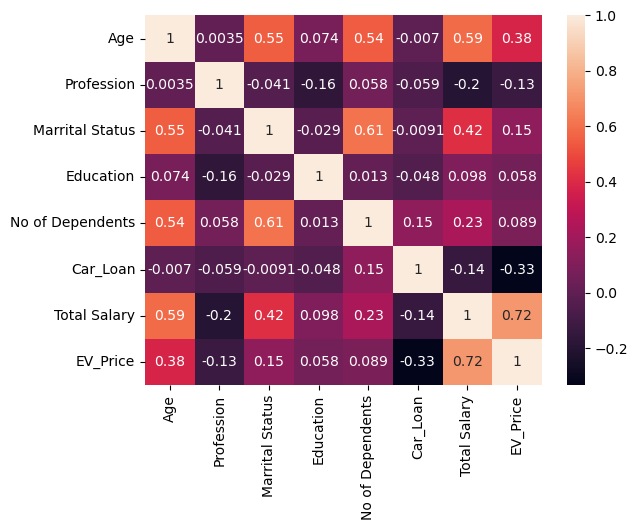

In [27]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot = True)

# PCA

In [28]:
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
pca = PCA()
pca.fit_transform(X_scaled) 
pca.explained_variance_ratio_

array([0.34653101, 0.1920909 , 0.14332375, 0.11282393, 0.08822937,
       0.04894954, 0.04512684, 0.02292466])

In [30]:
df_pca = pca.transform(X_scaled)

In [31]:
df_pca

array([[-3.45677867e+00,  6.18798048e-01, -1.77572927e+00,
        -1.51357297e-01,  1.04774881e+00, -2.31055507e-01,
         2.56545218e-01, -1.54748607e-01],
       [-2.74146311e-01, -6.58946382e-01, -1.69578615e+00,
        -4.21080390e-02,  2.91097662e-01,  4.05744289e-01,
        -4.05433845e-01, -3.39777624e-01],
       [ 8.79912051e-01, -2.38863673e+00,  9.25666954e-01,
        -3.63318760e-01,  1.11653795e+00, -4.53815385e-01,
         4.86613062e-01, -5.24481726e-01],
       [ 7.71649263e-01, -3.76038215e-01,  7.57105622e-01,
         1.68539288e+00,  1.63439395e-01,  4.68666099e-02,
         1.43956705e-01, -7.23372422e-02],
       [ 2.19923405e-01,  2.52807788e-01, -1.51307720e+00,
        -3.99143814e-01,  7.10609870e-01, -5.60849141e-02,
        -1.39262485e+00, -5.44491595e-01],
       [-1.47473925e+00, -1.89222105e+00, -7.00470678e-01,
        -1.29398490e+00, -7.61902787e-01, -4.38450978e-01,
        -7.54217849e-01, -1.85311184e-01],
       [ 1.00939711e-01, -4.987139

In [32]:
df_pca.shape

(99, 8)

In [33]:
df_pca = pd.DataFrame(df_pca, columns = [f'PC{x +1}' for x in range(len(df.columns))])

In [34]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.456779,0.618798,-1.775729,-0.151357,1.047749,-0.231056,0.256545,-0.154749
1,-0.274146,-0.658946,-1.695786,-0.042108,0.291098,0.405744,-0.405434,-0.339778
2,0.879912,-2.388637,0.925667,-0.363319,1.116538,-0.453815,0.486613,-0.524482
3,0.771649,-0.376038,0.757106,1.685393,0.163439,0.046867,0.143957,-0.072337
4,0.219923,0.252808,-1.513077,-0.399144,0.710610,-0.056085,-1.392625,-0.544492


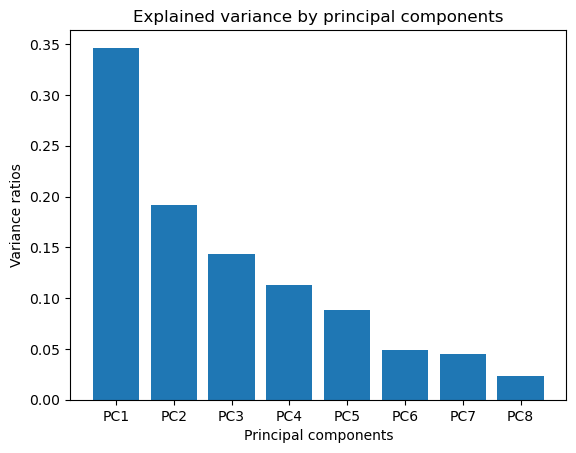

In [35]:
plt.bar(df_pca.columns, pca.explained_variance_ratio_)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Variance ratios')
plt.show()

In [36]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [37]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.673480,0.346531,0.346531
PC2,1.245957,0.192091,0.538622
PC3,1.076239,0.143324,0.681946
PC4,0.954883,0.112824,0.794770
PC5,0.844415,0.088229,0.882999
PC6,0.628961,0.048950,0.931948
PC7,0.603903,0.045127,0.977075
PC8,0.430429,0.022925,1.000000


In [38]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(X_scaled)
data = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3','PC4','PC5'])
data.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.456779,0.618798,-1.775729,-0.151357,1.047749
1,-0.274146,-0.658946,-1.695786,-0.042108,0.291098
2,0.879912,-2.388637,0.925667,-0.363319,1.116538
3,0.771649,-0.376038,0.757106,1.685393,0.163439
4,0.219923,0.252808,-1.513077,-0.399144,0.710610


In [39]:
factor_loadings = pd.DataFrame(pca.components_, columns = df.columns, index = data.columns).T

In [40]:
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5
Age,0.501727,-0.146188,0.023201,0.076935,0.174596
Profession,-0.083224,-0.251248,0.681966,0.446112,0.465315
Marrital Status,0.437035,-0.326370,0.016456,0.021873,-0.422051
Education,0.066327,0.208098,-0.555692,0.779063,0.136463
No of Dependents,0.379792,-0.475587,-0.025641,0.150289,-0.153474
Car_Loan,-0.082900,-0.484098,-0.447788,-0.331813,0.622676
Total Salary,0.495287,0.276125,-0.024150,-0.182478,0.260782
EV_Price,0.386678,0.478437,0.153508,-0.147184,0.277420


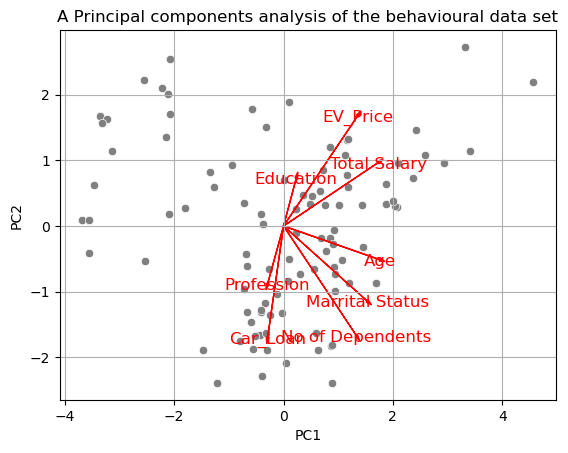

In [41]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the behavioural data set')
plt.grid(True)
plt.savefig("pca_2w.png", format = 'png')
plt.show()

In [42]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.456779,0.618798,-1.775729,-0.151357,1.047749
1,-0.274146,-0.658946,-1.695786,-0.042108,0.291098
2,0.879912,-2.388637,0.925667,-0.363319,1.116538
3,0.771649,-0.376038,0.757106,1.685393,0.163439
4,0.219923,0.252808,-1.513077,-0.399144,0.710610


In [43]:
df_km = [KMeans(n_clusters = k, random_state = 42).fit(X_scaled) for k in range(1, 9)]
df_km

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42)]

In [44]:
wcss = [model.inertia_ for model in df_km]
wcss

[791.9999999999999,
 602.4427327451046,
 493.07404642286355,
 428.6495905279402,
 372.54959210202406,
 348.50790952741255,
 330.5873757665777,
 305.07112130733714]

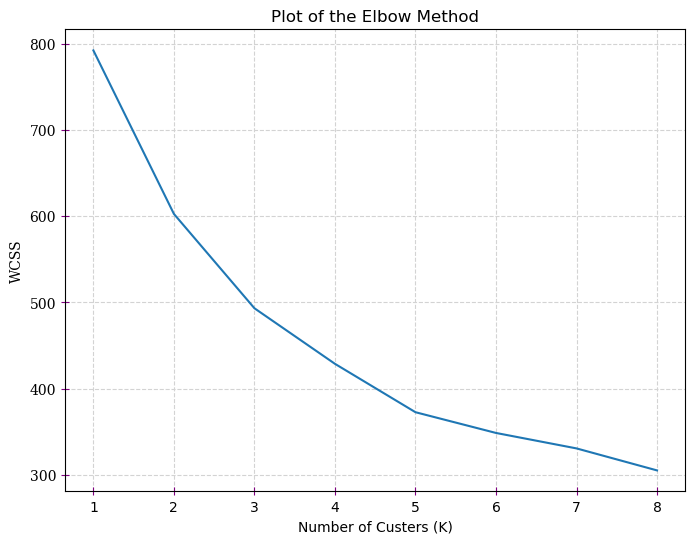

In [45]:
plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(range(1,9), wcss)
plt.xticks(range(1,9))
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [46]:
kmean = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmean.fit(X_pca)

KMeans(n_clusters=5, random_state=42)

In [47]:
kmean.labels_

array([4, 3, 3, 3, 0, 2, 2, 3, 3, 2, 0, 2, 4, 4, 2, 0, 4, 4, 4, 2, 0, 1,
       1, 3, 2, 1, 3, 1, 3, 0, 1, 1, 0, 1, 2, 0, 4, 0, 4, 1, 3, 4, 1, 0,
       3, 1, 1, 1, 3, 2, 3, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 4, 4, 3, 1, 3,
       1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 3, 1, 0, 0, 2, 1, 3, 0, 2, 3, 4, 0,
       1, 3, 2, 0, 1, 4, 4, 0, 3, 0, 3])

In [48]:
pd.Series(kmean.labels_).value_counts()

0    26
1    22
3    20
4    18
2    13
Name: count, dtype: int64

In [49]:
df['clusters'] = kmean.labels_

In [50]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,clusters
0,27,0,0,1,0,1,800000,800000,4
1,35,0,1,1,2,1,2000000,1000000,3
2,45,1,1,0,4,1,1800000,1200000,3
3,41,1,1,1,3,0,2200000,1200000,3
4,31,0,1,1,2,1,2600000,1600000,0


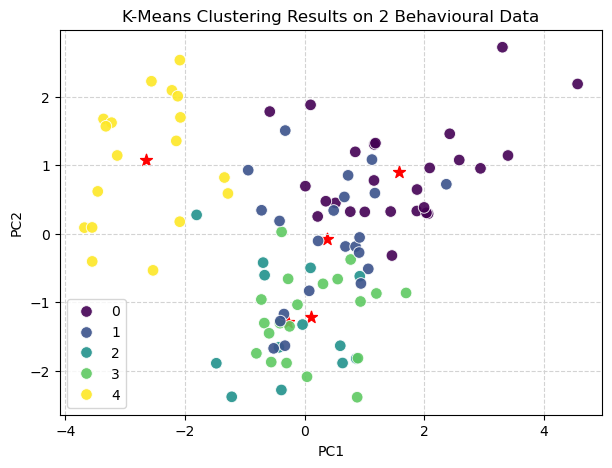

In [51]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.title('K-Means Clustering Results on 2 Behavioural Data')
plt.show()

# Predictions

In [52]:
df["clusters"].value_counts()

clusters
0    26
1    22
3    20
4    18
2    13
Name: count, dtype: int64

In [53]:
Cluster_0=df[df.clusters==0]
Cluster_1=df[df.clusters==1]
Cluster_2=df[df.clusters==2]
Cluster_3=df[df.clusters==3]
Cluster_4=df[df.clusters==4]

In [54]:
[Cluster_0["Age"].value_counts().head(),
Cluster_1["Age"].value_counts().head(),
Cluster_2["Age"].value_counts().head(),
Cluster_3["Age"].value_counts().head(),
Cluster_4["Age"].value_counts().head()]

[Age
 36    3
 41    3
 44    3
 35    2
 49    2
 Name: count, dtype: int64,
 Age
 36    6
 41    3
 37    3
 35    2
 31    2
 Name: count, dtype: int64,
 Age
 35    3
 31    2
 42    2
 28    1
 34    1
 Name: count, dtype: int64,
 Age
 35    3
 34    3
 36    3
 31    2
 51    2
 Name: count, dtype: int64,
 Age
 27    6
 29    4
 30    3
 28    2
 26    1
 Name: count, dtype: int64]

In [55]:
[Cluster_0["Profession"].value_counts().head(),
Cluster_1["Profession"].value_counts().head(),
Cluster_2["Profession"].value_counts().head(),
Cluster_3["Profession"].value_counts().head(),
 Cluster_4["Profession"].value_counts().head()]

[Profession
 0    25
 1     1
 Name: count, dtype: int64,
 Profession
 1    13
 0     9
 Name: count, dtype: int64,
 Profession
 0    12
 1     1
 Name: count, dtype: int64,
 Profession
 1    12
 0     8
 Name: count, dtype: int64,
 Profession
 0    10
 1     8
 Name: count, dtype: int64]

In [56]:
[Cluster_0["Car_Loan"].value_counts().head(),
Cluster_1["Car_Loan"].value_counts().head(),
Cluster_2["Car_Loan"].value_counts().head(),
Cluster_3["Car_Loan"].value_counts().head(),
Cluster_4["Car_Loan"].value_counts().head()]

[Car_Loan
 0    22
 1     4
 Name: count, dtype: int64,
 Car_Loan
 0    21
 1     1
 Name: count, dtype: int64,
 Car_Loan
 1    9
 0    4
 Name: count, dtype: int64,
 Car_Loan
 1    13
 0     7
 Name: count, dtype: int64,
 Car_Loan
 0    13
 1     5
 Name: count, dtype: int64]

In [57]:
[Cluster_0["Total Salary"].value_counts().head(),
Cluster_1["Total Salary"].value_counts().head(),
Cluster_2["Total Salary"].value_counts().head(),
Cluster_3["Total Salary"].value_counts().head(),
Cluster_4["Total Salary"].value_counts().head()]

[Total Salary
 3100000    2
 4500000    2
 2500000    2
 2700000    2
 4000000    2
 Name: count, dtype: int64,
 Total Salary
 2400000    2
 2900000    2
 2100000    2
 2200000    2
 3600000    2
 Name: count, dtype: int64,
 Total Salary
 1300000    3
 1400000    2
 2100000    2
 900000     1
 1800000    1
 Name: count, dtype: int64,
 Total Salary
 2000000    3
 1800000    3
 2200000    3
 1600000    3
 1400000    2
 Name: count, dtype: int64,
 Total Salary
 1400000    4
 800000     3
 900000     3
 1100000    2
 1700000    1
 Name: count, dtype: int64]